 # Customer churn Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [3]:
# reading the data
df = pd.read_csv("customer_churn_large_dataset - Sheet1.csv", index_col=0)

EDA

In [4]:
# The first 5 observation 
df.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,
1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
2,Customer_2,62,Female,New York,1,48.76,172,0
3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
4,Customer_4,36,Female,Miami,3,97.94,297,1
5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
# The size of the data set 
df.shape

(100000, 8)

In [6]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  object 
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  object 
 3   Location                    100000 non-null  object 
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [7]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
5%,20.000000,2.000000,33.530000,72.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
90%,65.000000,22.000000,93.080000,456.000000,1.000000
95%,68.000000,23.000000,96.510000,478.000000,1.000000


In [8]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Gender', 'Location', 'Churn']

In [9]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

Churn (Dependent Variable)

In [10]:
# Frequency of classes of dependent variable
df["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [11]:
# Customers leaving the bank
churn = df.loc[df["Churn"]==1]

In [12]:
# Customers who did not leave the bank
not_churn = df.loc[df["Churn"]==0]

Categorical Variables

1. Subscription_Length_Months

In [13]:
# Frequency of not_churn group according to Subscription_Length_Months
not_churn["Subscription_Length_Months"].value_counts().sort_values()

24    2030
19    2034
23    2035
17    2043
13    2047
3     2050
8     2066
12    2070
10    2074
4     2080
7     2096
9     2097
18    2099
16    2100
11    2108
1     2109
15    2113
21    2116
2     2119
22    2128
14    2140
6     2144
5     2155
20    2168
Name: Subscription_Length_Months, dtype: int64

In [14]:
# Frequency of churn group according to Subscription_Length_Months
churn["Subscription_Length_Months"].value_counts().sort_values()

15    2009
5     2016
4     2018
17    2021
9     2037
21    2038
6     2040
8     2040
23    2048
18    2072
19    2072
14    2073
10    2077
24    2083
12    2085
3     2086
11    2092
13    2107
2     2109
7     2115
16    2129
20    2135
1     2138
22    2139
Name: Subscription_Length_Months, dtype: int64

2. Gender

In [15]:
# Frequency of not_churn group according to Gender
not_churn["Gender"].value_counts().sort_values()

Male      24949
Female    25272
Name: Gender, dtype: int64

In [16]:
# Frequency of churn group according to Gender
churn["Gender"].value_counts().sort_values()

Male      24835
Female    24944
Name: Gender, dtype: int64

3. Location

In [17]:
# Frequency of not_churn group according to  Location
not_churn["Location"].value_counts().sort_values()

New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64

In [18]:
# Frequency of churn group according to  Location
churn["Location"].value_counts().sort_values()

Los Angeles     9880
Houston         9899
Chicago         9945
New York        9979
Miami          10076
Name: Location, dtype: int64

4. Monthly_Bill

In [19]:
# Frequency of not_churn group according to  Monthly_Bill
not_churn["Monthly_Bill"].value_counts().sort_values()

83.75      1
85.29      1
58.88      1
70.55      1
75.21      1
54.95      1
35.58      1
79.46      1
96.34      1
81.74      1
78.47      1
49.51      1
46.85      1
43.13      1
53.60      1
97.41      1
89.10      1
88.98      1
49.24      1
89.18      1
62.20      1
84.02      1
61.71      1
44.70      1
93.12      1
50.20      1
90.56      1
46.80      1
71.22      1
91.17      1
46.04      1
79.53      1
58.62      1
45.00      1
70.38      1
75.96      1
99.50      1
54.71      1
30.88      2
56.68      2
98.17      2
35.79      2
87.15      2
53.66      2
88.52      2
57.47      2
78.61      2
72.65      2
62.36      2
67.33      2
61.69      2
53.55      2
43.79      2
91.39      2
70.12      2
77.32      2
67.76      2
64.40      2
98.76      2
67.57      2
56.03      2
39.15      2
53.61      2
98.71      2
44.04      2
32.19      2
66.72      2
35.08      2
58.39      2
48.60      2
56.37      2
36.41      2
69.64      2
34.05      2
95.24      2
99.41      2
42.68      2

In [20]:
# Frequency of churn group according to  Monthly_Bill
churn["Monthly_Bill"].value_counts().sort_values()

93.22      1
65.42      1
50.72      1
87.88      1
88.12      1
79.33      1
79.45      1
57.71      1
83.01      1
36.52      1
92.59      1
39.32      1
35.59      1
76.25      1
89.09      1
45.62      1
99.80      1
36.89      1
81.06      1
100.00     1
35.25      1
98.40      1
73.10      1
47.18      1
82.03      1
92.99      1
43.66      1
72.19      1
90.00      1
38.03      1
47.32      1
79.08      1
48.35      1
40.42      1
60.64      1
86.49      1
79.48      1
36.55      1
71.88      1
76.67      1
67.53      1
80.81      1
55.26      1
38.54      2
84.24      2
74.15      2
68.77      2
51.69      2
80.32      2
48.15      2
94.21      2
40.83      2
72.77      2
56.83      2
33.37      2
49.88      2
77.04      2
61.61      2
47.57      2
55.82      2
71.73      2
41.13      2
42.44      2
71.15      2
44.48      2
64.77      2
83.59      2
74.04      2
86.38      2
63.63      2
39.63      2
79.00      2
47.71      2
99.10      2
46.51      2
99.11      2
38.02      2

5. Total_Usage_GB

In [21]:
# Frequency of not_churn group according to  Total_Usage_GB
not_churn["Total_Usage_GB"].value_counts().sort_values()

225     82
180     83
62      84
328     84
254     86
390     86
444     86
365     86
78      87
418     88
195     88
205     89
447     90
92      90
255     91
87      91
219     91
154     92
82      93
424     93
215     93
85      93
66      94
338     94
336     95
325     95
245     95
479     95
400     95
414     96
334     97
244     97
110     97
300     97
339     97
355     97
112     97
409     98
270     98
63      98
283     98
142     98
253     98
361     98
486     98
434     98
358     99
134     99
482     99
188     99
429     99
286     99
242     99
421     99
368     99
228     99
456     99
411     99
179     99
184    100
53     100
274    100
383    100
164    100
126    100
472    100
93     100
376    100
172    100
395    100
182    101
57     101
191    101
267    101
169    101
144    101
98     101
107    101
457    101
460    101
271    101
70     101
445    101
67     101
281    101
463    101
380    102
278    102
130    102
211    102
109    102

In [22]:
# Frequency of churn group according to  Total_Usage_GB
churn["Total_Usage_GB"].value_counts().sort_values()

203     81
362     83
174     83
311     85
390     86
252     86
60      88
247     89
291     89
180     90
259     90
384     90
181     90
473     91
433     92
339     92
163     92
392     92
330     92
404     92
422     93
287     93
324     93
400     93
398     93
179     94
486     94
136     95
168     95
142     95
182     95
378     95
82      95
475     95
490     95
289     96
215     96
432     96
145     96
319     96
290     96
312     96
478     97
124     97
141     97
367     97
420     97
492     97
161     97
76      98
418     98
123     98
132     98
453     98
299     98
430     98
199     98
460     98
411     98
61      99
439     99
111     99
310     99
465     99
309     99
415     99
98      99
248     99
129    100
296    100
249    100
326    100
70     100
147    101
308    101
438    101
351    101
325    101
96     102
458    102
402    102
431    102
54     102
120    102
498    102
434    102
421    102
171    102
314    102
75     102
250    102

# Numerical Variables

1. Age

In [23]:
# Let's examine the Age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        44.003305
std         15.289008
min         18.000000
5%          20.000000
25%         31.000000
50%         44.000000
75%         57.000000
90%         65.000000
95%         68.000000
99%         70.000000
max         70.000000
Name: Age, dtype: float64

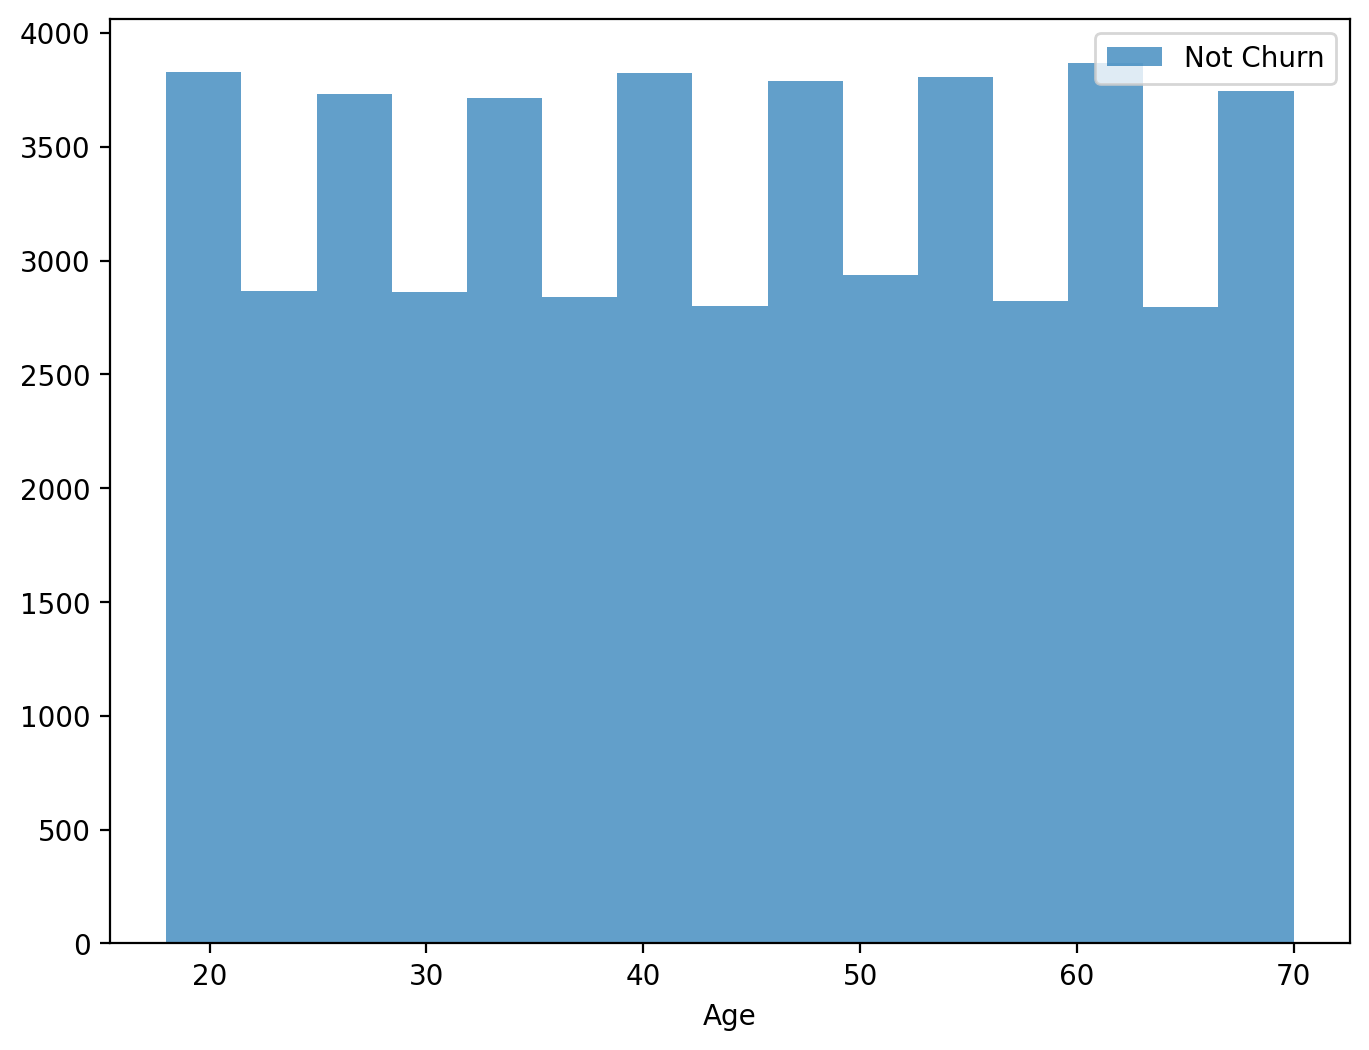

In [24]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [25]:
# Let's examine the Age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        44.050945
std         15.271592
min         18.000000
5%          20.000000
25%         31.000000
50%         44.000000
75%         57.000000
90%         65.000000
95%         68.000000
99%         70.000000
max         70.000000
Name: Age, dtype: float64

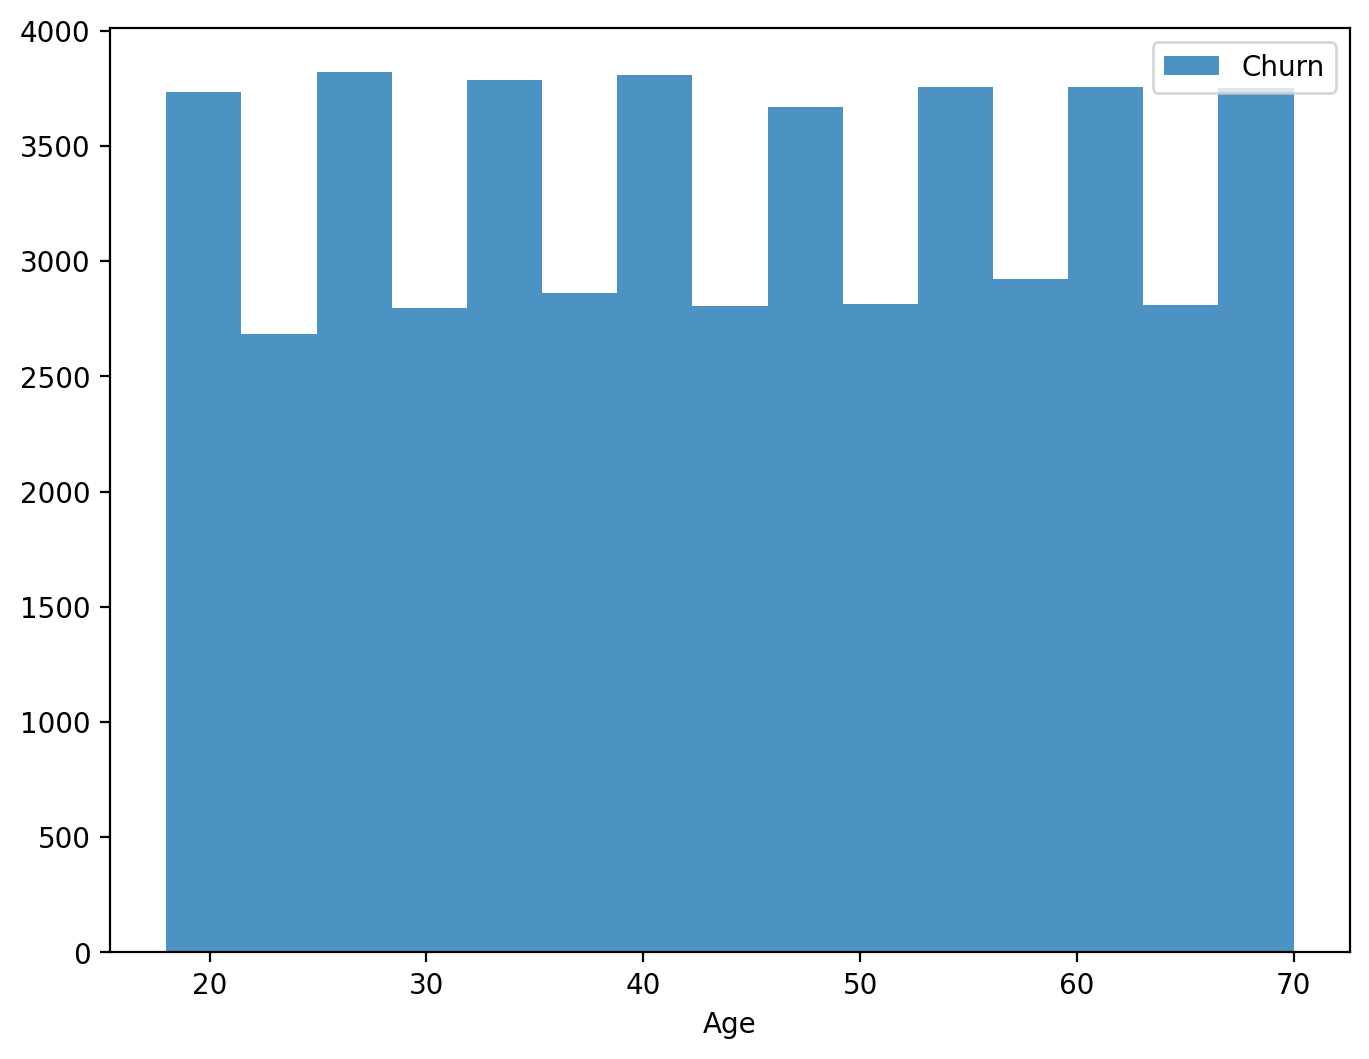

In [26]:
# distribution of the Age for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

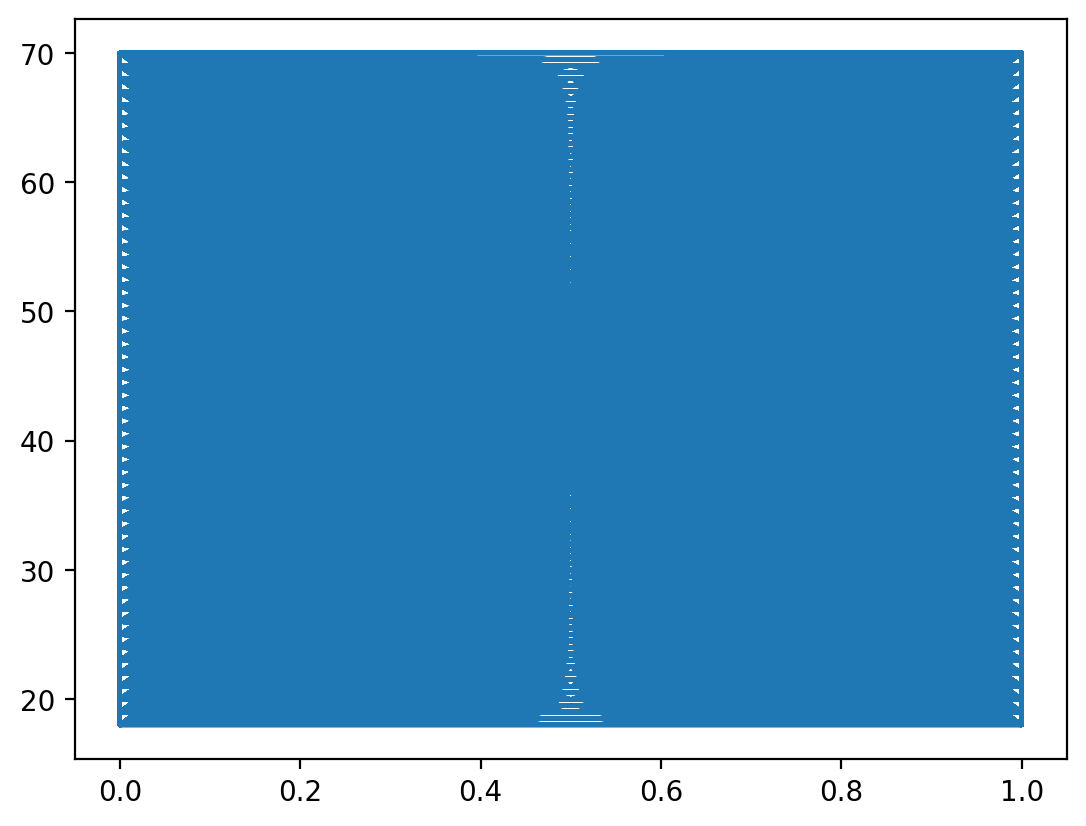

In [29]:
plt.plot("Churn", "Age", data = df)

2. Subscription_Length_Months

In [30]:
# Let's examine the Subscription_Length_Months of the not_churn group
not_churn["Subscription_Length_Months"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    50221.000000
mean        12.474045
std          6.918075
min          1.000000
5%           2.000000
25%          6.000000
50%         12.000000
75%         18.000000
90%         22.000000
95%         23.000000
99%         24.000000
max         24.000000
Name: Subscription_Length_Months, dtype: float64

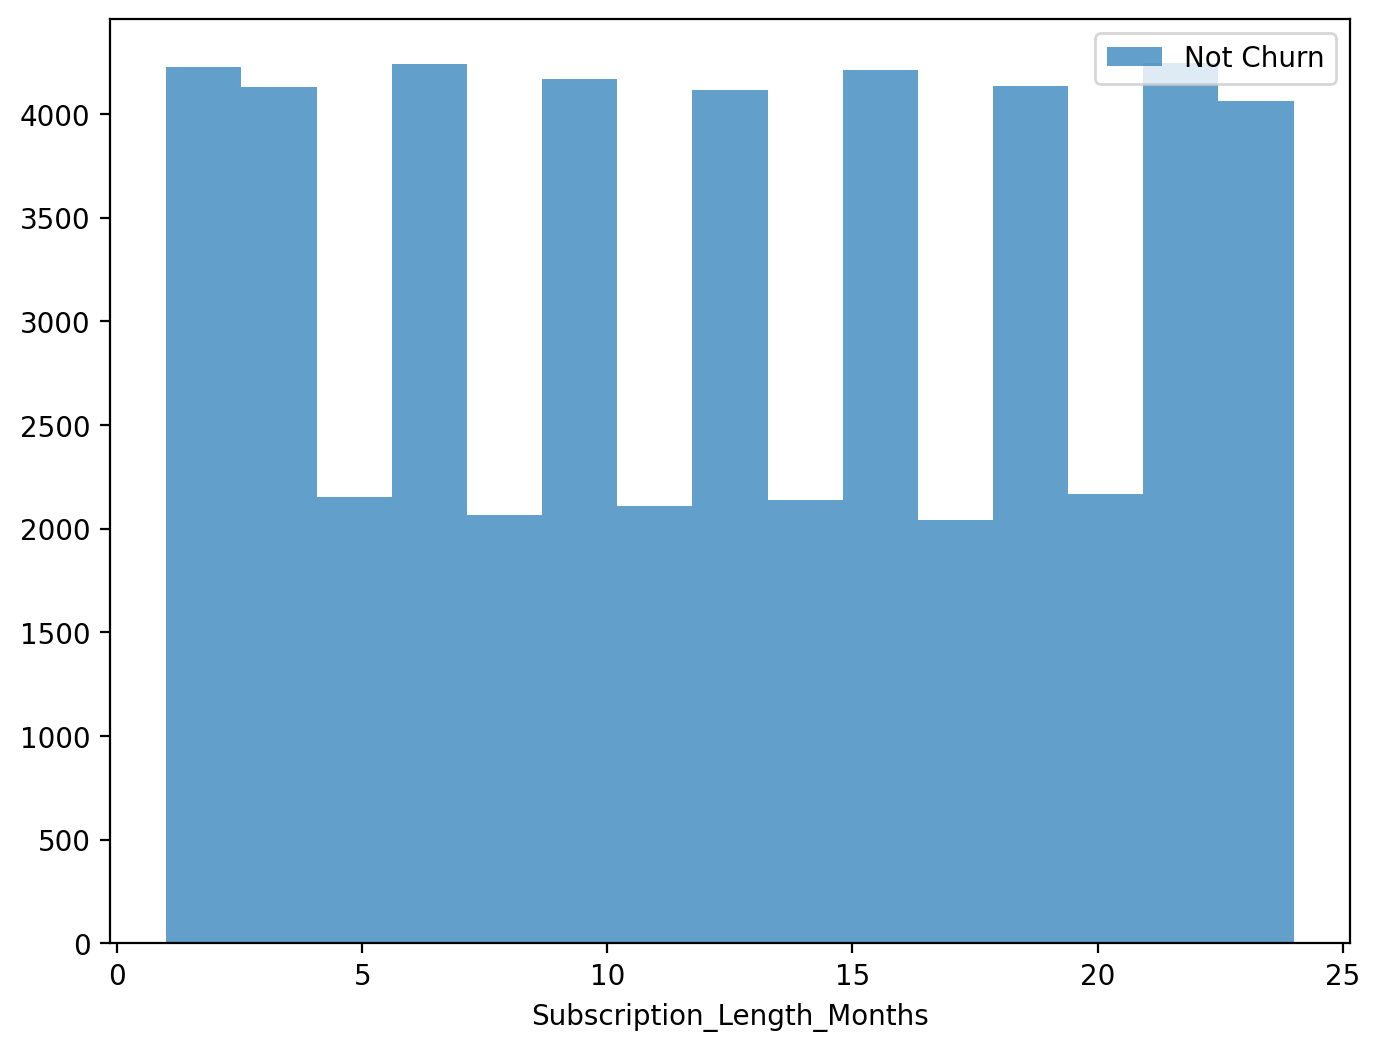

In [31]:
# distribution of the Subscription_Length_Months for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Subscription_Length_Months')
pyplot.hist(not_churn["Subscription_Length_Months"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [32]:
# Let's examine the Subscription_Length_Months of the churn group
churn["Subscription_Length_Months"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        12.506298
std          6.934943
min          1.000000
5%           2.000000
25%          7.000000
50%         13.000000
75%         19.000000
90%         22.000000
95%         23.000000
99%         24.000000
max         24.000000
Name: Subscription_Length_Months, dtype: float64

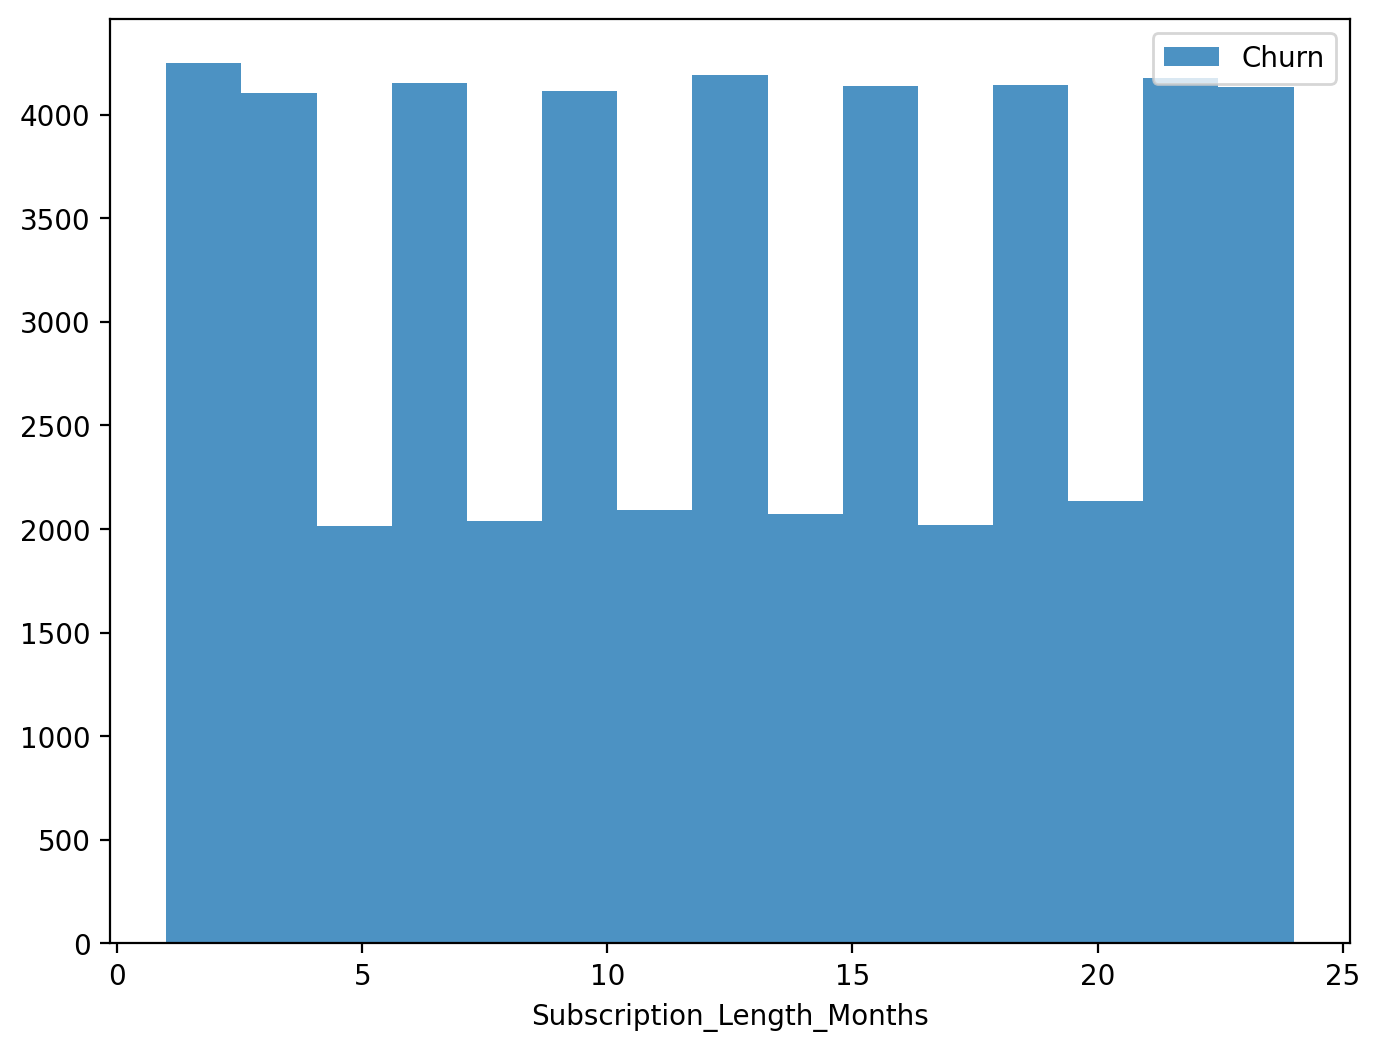

In [33]:
# distribution of the Subscription_Length_Months for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Subscription_Length_Months')
pyplot.hist(churn["Subscription_Length_Months"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
plt.plot("Churn", "Subscription_Length_Months", data = df)

3. Monthly_Bill

In [ ]:
# Let's examine the Monthly_Bill of the not_churn group
not_churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

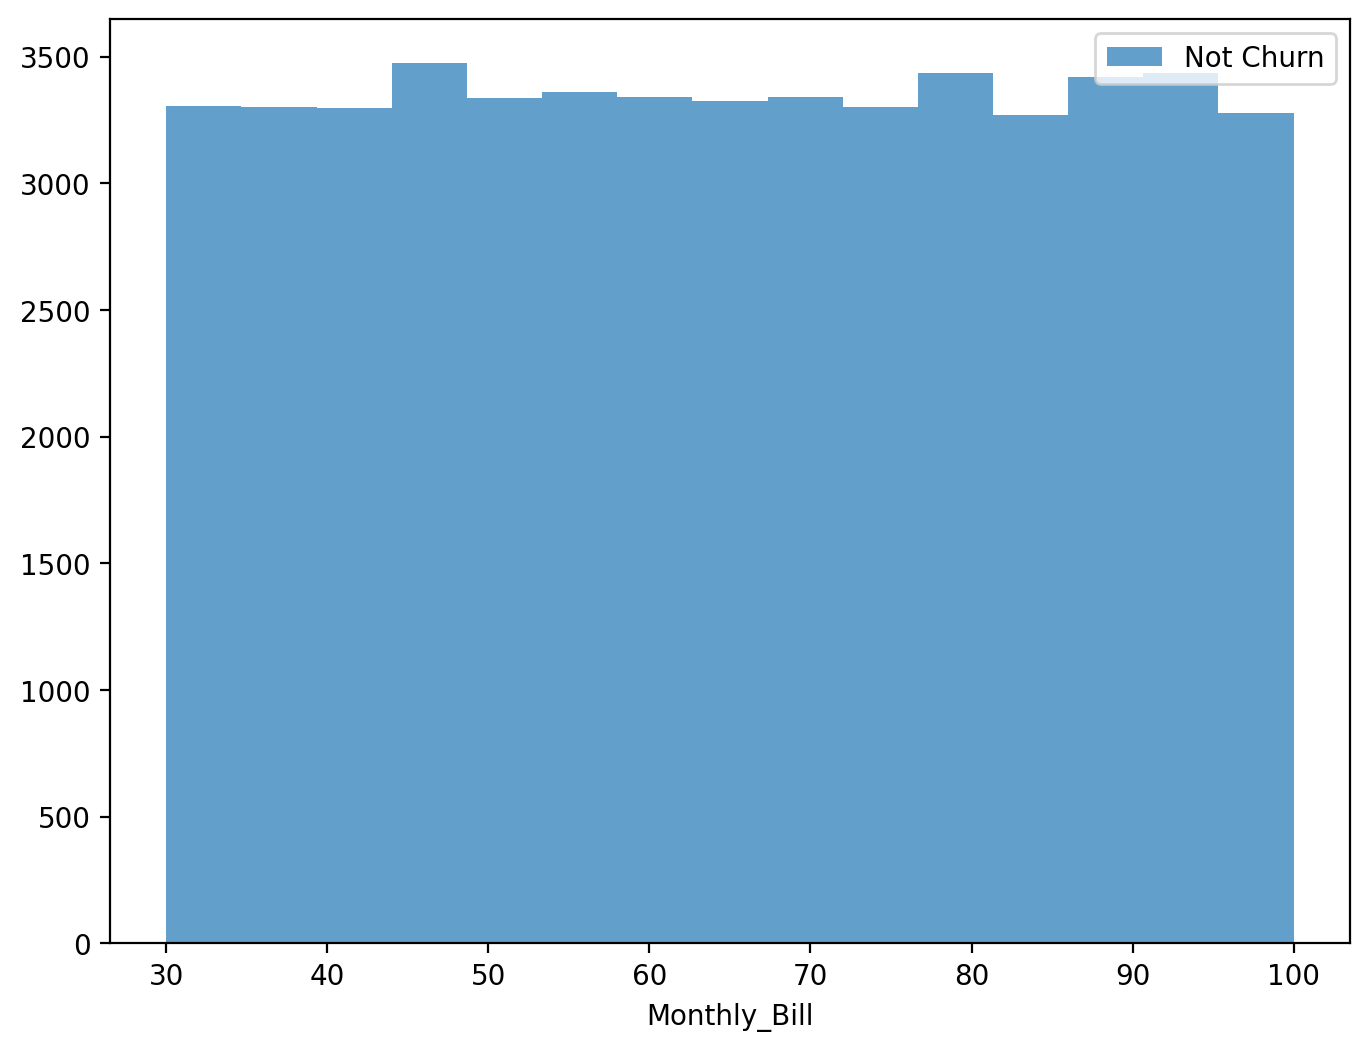

In [36]:
# distribution of the Monthly_Bill for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(not_churn["Monthly_Bill"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [37]:
# Let's examine the Monthly_Bill of the churn group
churn["Monthly_Bill"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    49779.000000
mean        65.048903
std         20.282146
min         30.000000
5%          33.500000
25%         47.520000
50%         64.950000
75%         82.690000
90%         93.200000
95%         96.620000
99%         99.320000
max        100.000000
Name: Monthly_Bill, dtype: float64

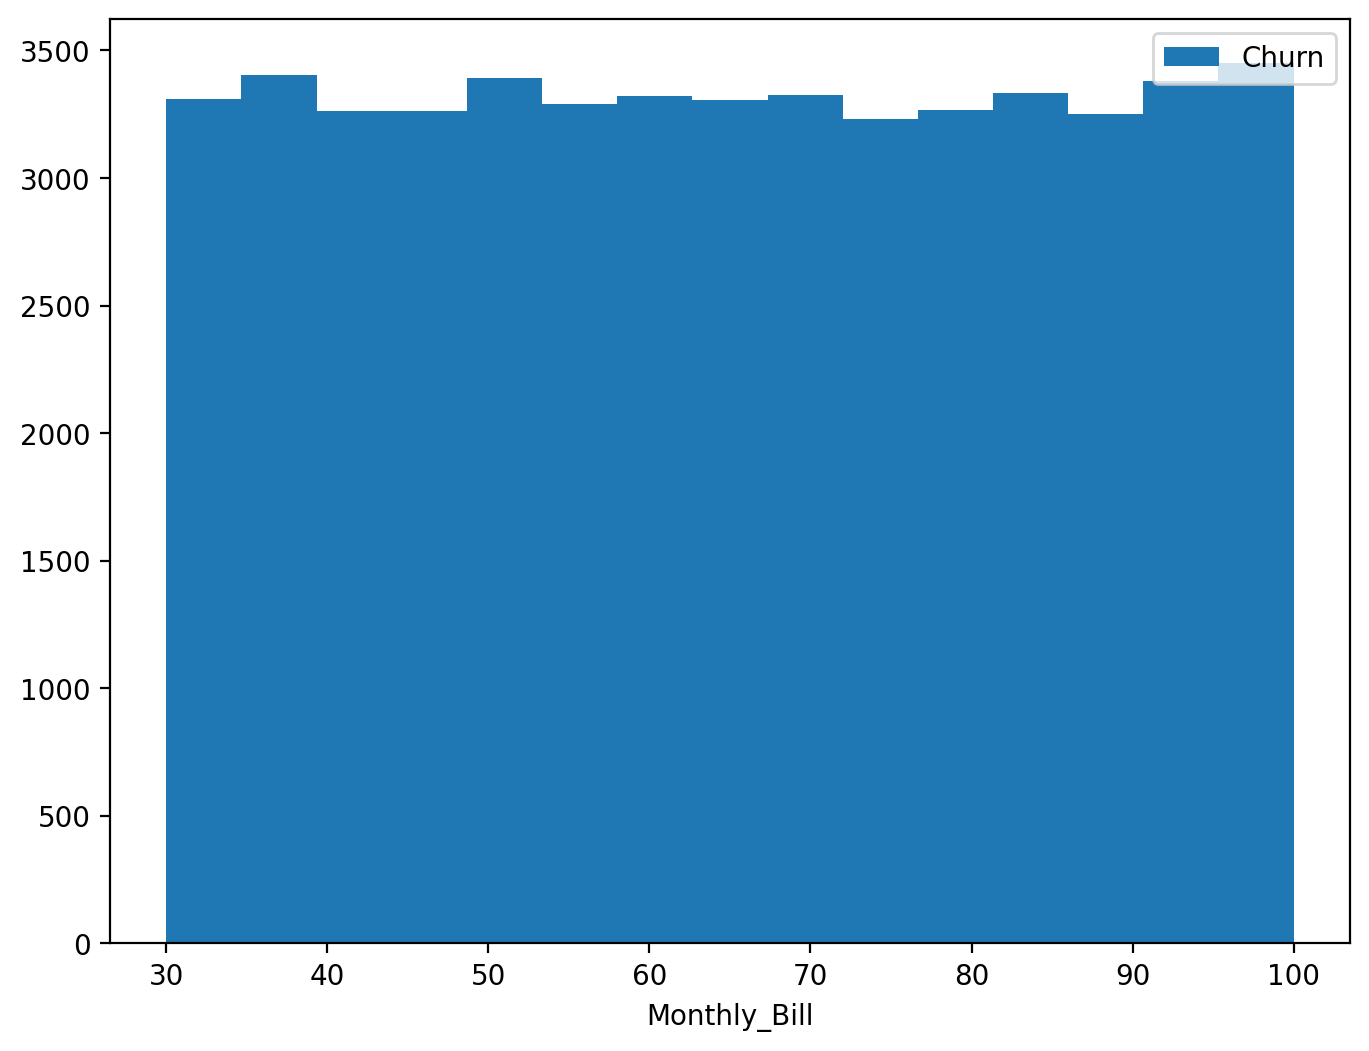

In [38]:
# distribution of the Monthly_Bill for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Monthly_Bill')
pyplot.hist(churn["Monthly_Bill"],bins=15, alpha=1, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

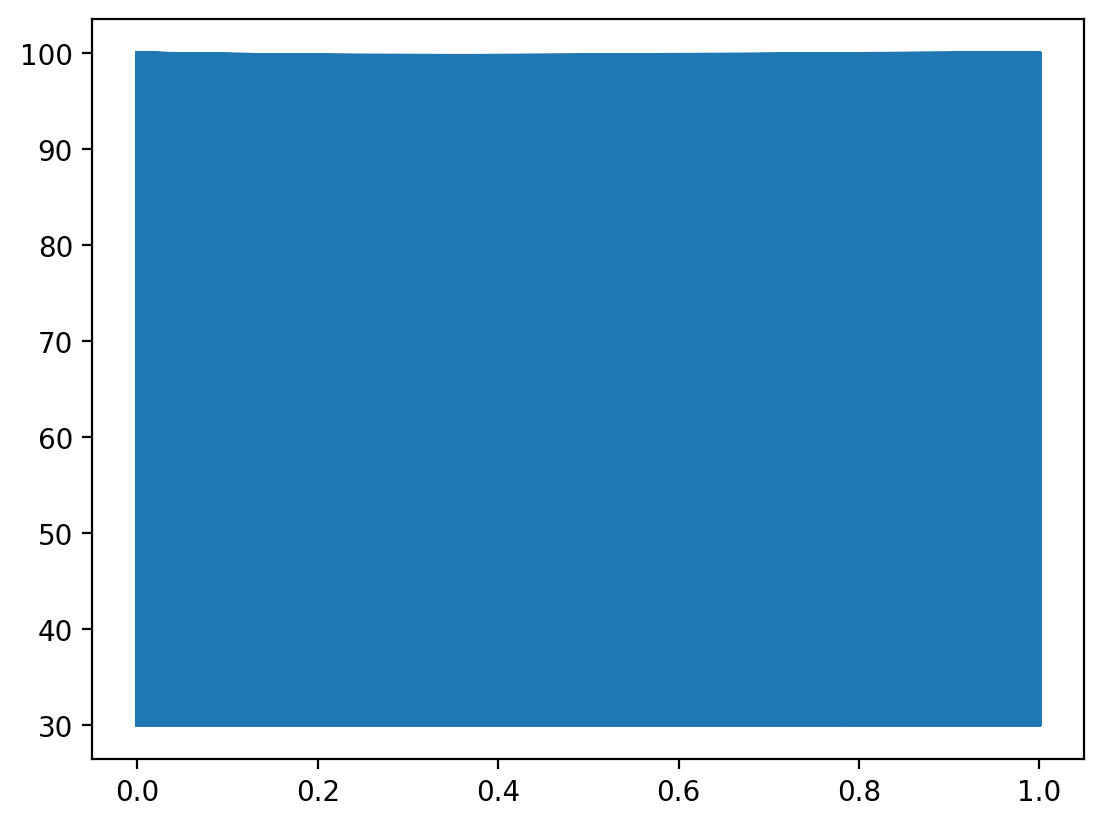

In [39]:
plt.plot("Churn", "Monthly_Bill", data = df)

# Correlation Matrix

<Axes: >

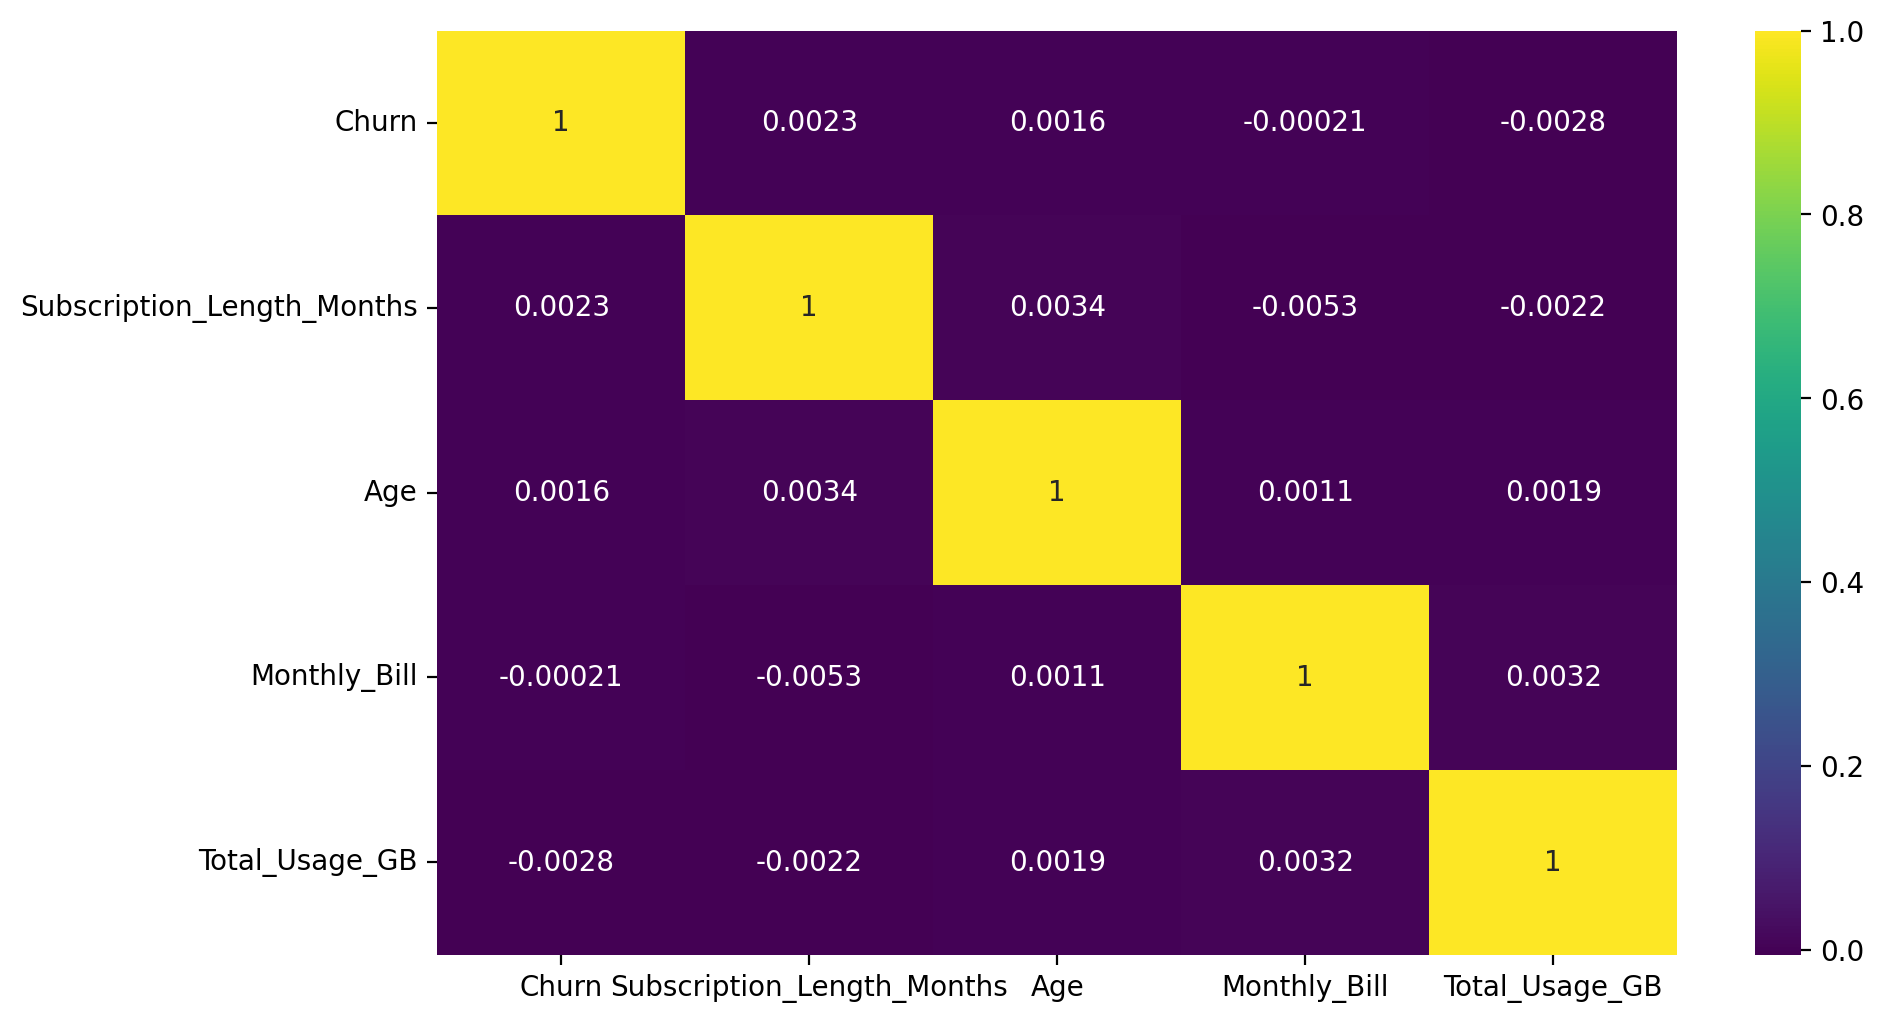

In [40]:
# Churn correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Churn')['Churn'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Data Pre-Processing

Missing Value

In [41]:
# # Missing Observation Analysis
df.isnull().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Outliers

In [42]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [44]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

Age has  None Outliers
Subscription_Length_Months has  None Outliers
Monthly_Bill has  None Outliers
Total_Usage_GB has  None Outliers


Feature Engineering

In [45]:
# we standardize Subscription_Length_Months with age
df["NewSubscription_Length_Months"] = df["Subscription_Length_Months"]/df["Age"]
df["NewMonthly_Bill"] = pd.qcut(df['Monthly_Bill'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewTotal_Usage_GB"] = pd.qcut(df['Total_Usage_GB'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [46]:
df.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewSubscription_Length_Months,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB
CustomerID,,,,,,,,,,,,
1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,0.269841,4,7,5
2,Customer_2,62,Female,New York,1,48.76,172,0,0.016129,2,7,3
3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,0.208333,5,1,10
4,Customer_4,36,Female,Miami,3,97.94,297,1,0.083333,6,3,6
5,Customer_5,46,Female,Miami,19,58.14,266,0,0.413043,3,5,5


One Hot Encoding

In [47]:
# Variables to apply one hot encoding
list = ["Gender", "Location"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [48]:
df.head()

,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewSubscription_Length_Months,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
CustomerID,,,,,,,,,,,,,,,
1,Customer_1,63,17,73.36,236,0,0.269841,4,7,5,1,0,1,0,0
2,Customer_2,62,1,48.76,172,0,0.016129,2,7,3,0,0,0,0,1
3,Customer_3,24,5,85.47,460,0,0.208333,5,1,10,0,0,1,0,0
4,Customer_4,36,3,97.94,297,1,0.083333,6,3,6,0,0,0,1,0
5,Customer_5,46,19,58.14,266,0,0.413043,3,5,5,0,0,0,1,0


Scalling

In [49]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [50]:
new_cols_ohe = ["Gender_Male","Location_Houston	","Location_Los Angeles	","Location_Miami","Location_New York"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Churn"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

TypeError: could not convert string to float: 'Customer_1'

In [53]:
df.head()

,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,NewSubscription_Length_Months,NewMonthly_Bill,NewAgeScore,NewTotal_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
CustomerID,,,,,,,,,,,,,,,
1,Customer_1,63,17,73.36,236,0,0.269841,4,7,5,1,0,1,0,0
2,Customer_2,62,1,48.76,172,0,0.016129,2,7,3,0,0,0,0,1
3,Customer_3,24,5,85.47,460,0,0.208333,5,1,10,0,0,1,0,0
4,Customer_4,36,3,97.94,297,1,0.083333,6,3,6,0,0,0,1,0
5,Customer_5,46,19,58.14,266,0,0.413043,3,5,5,0,0,0,1,0


# Modelling

In [54]:
pip install LightGBM

Note: you may need to restart the kernel to use updated packages.


In [62]:
X = df.drop("Churn",axis=1)
y = df["Churn"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM")]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [65]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

ValueError: could not convert string to float: 'Customer_26022'

In [67]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

NameError: name 'conf_mat' is not defined

In [66]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

ValueError: could not convert string to float: 'Customer_71752'

In [63]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [64]:
generate_auc_roc_curve(model_GB, X_test)

NameError: name 'model_GB' is not defined